# Deep Learning Intro

In [459]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.utils.np_utils import to_categorical
%matplotlib inline

## Shallow and Deep Networks

In [7]:
# from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)

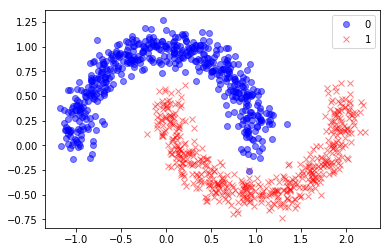

In [15]:
plt.plot(X[y==0,0], X[y==0,1], 'bo', alpha=0.5)
plt.plot(X[y==1,0], X[y==1,1], 'rx', alpha=0.5)
plt.legend(['0','1'])

In [17]:
print(X.shape) # two features x 1000 samples
print(y.shape) # 1 output x 1000 samples

(1000, 2)
(1000,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
dummy = DummyClassifier()

In [36]:
dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [37]:
dummy_pred = dummy.predict(X_test)

In [38]:
confusion_matrix(y_test, dummy_pred)

array([[78, 59],
       [83, 80]])

In [39]:
print(classification_report(y_test, dummy_pred))

             precision    recall  f1-score   support

          0       0.48      0.57      0.52       137
          1       0.58      0.49      0.53       163

avg / total       0.53      0.53      0.53       300



In [24]:
def build_shallow_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
    model.compile(Adam(lr=0.1), 'binary_crossentropy', metrics=['accuracy'])
    return(model)

In [25]:
model = build_shallow_model()
model.fit(X_train, y_train, epochs=200, verbose=0)

In [26]:
results = model.evaluate(X_test, y_test)

 32/300 [==>...........................] - ETA: 0s

In [27]:
print("Accuracy: {:0.3f}".format(results[1]))

Accuracy: 0.847


In [46]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) -0.1
    amax, bmax = X.max(axis=0) +0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(),bb.ravel()]
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
    plt.figure(figsize=(12,8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0,0], X[y==0,1], 'bo', alpha=0.5)
    plt.plot(X[y==1,0], X[y==1,1], 'rx', alpha=0.5)
    plt.legend(['0','1'])

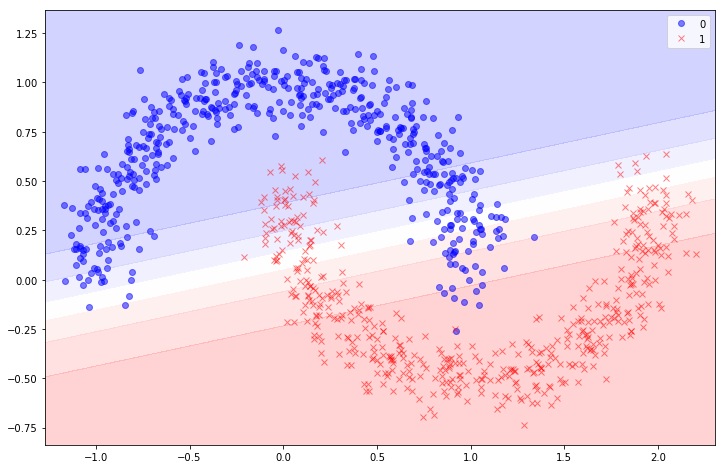

In [47]:
plot_decision_boundary(model, X, y)

In [109]:
def build_deep_model():
    model = Sequential()
    model.add(Dense(4, input_shape=(2,), activation='tanh'))
    model.add(Dense(2, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
    return(model)

In [110]:
model = build_deep_model()

In [111]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [112]:
model.evaluate(X_test, y_test)

 32/300 [==>...........................] - ETA: 0s

[0.0017055143074442942, 1.0]

In [113]:
y_pred = model.predict_classes(X_test)

 32/300 [==>...........................] - ETA: 0s

In [114]:
confusion_matrix(y_test, y_pred)

array([[137,   0],
       [  0, 163]])

In [115]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       137
          1       1.00      1.00      1.00       163

avg / total       1.00      1.00      1.00       300



In [116]:
accuracy_score(y_test, y_pred)

1.0

In [117]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

 32/300 [==>...........................] - ETA: 0sThe Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


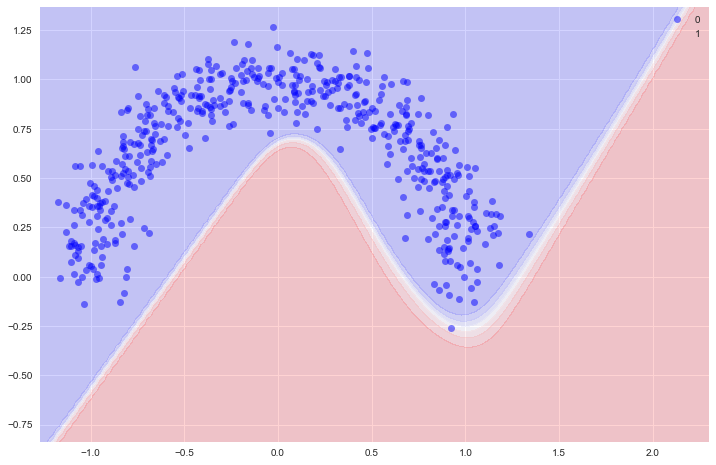

In [118]:
plot_decision_boundary(model, X, y)

In [119]:
def build_deep_model():
    model = Sequential()
    model.add(Dense(8, input_shape=(2,), activation='tanh'))
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])
    return(model)
model = build_deep_model()
model.fit(X_train, y_train, epochs=100, verbose=0)

In [120]:
model.evaluate(X_test, y_test)

 32/300 [==>...........................] - ETA: 0s

[0.0011839416378643364, 1.0]

In [121]:
y_pred = model.predict_classes(X_test)

 32/300 [==>...........................] - ETA: 0s

In [122]:
confusion_matrix(y_test, y_pred)

array([[137,   0],
       [  0, 163]])

In [123]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       137
          1       1.00      1.00      1.00       163

avg / total       1.00      1.00      1.00       300



In [124]:
accuracy_score(y_test, y_pred)

1.0

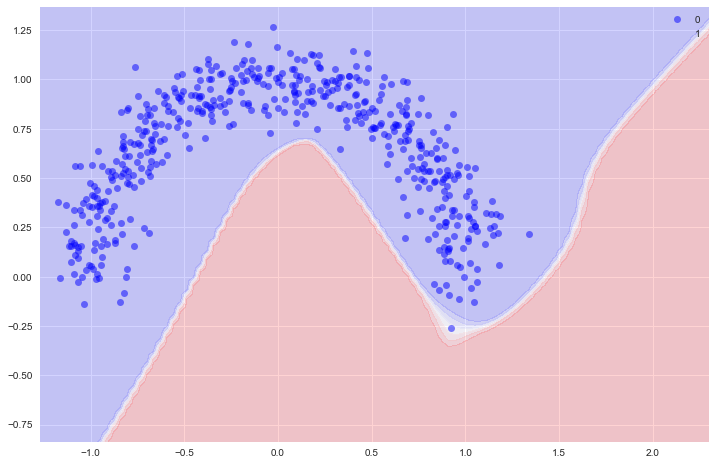

In [125]:
plot_decision_boundary(model, X, y)

# Multiclass classification
## Iris Dataset

In [79]:
df = pd.read_csv('../data/iris.csv')

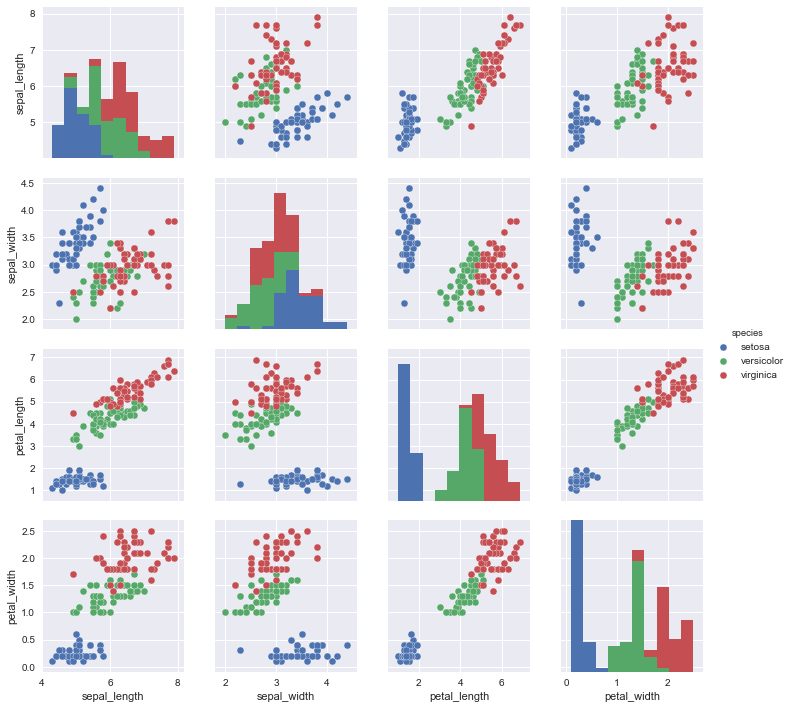

In [80]:
sns.pairplot(df, hue="species")

In [126]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [128]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [135]:
X = df.drop('species', axis=1)
target_names = df['species'].unique()

In [133]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [136]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [137]:
target_dict = {n:i for i,n in enumerate(target_names)}

In [138]:
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [139]:
y = df['species'].map(target_dict)

In [141]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: species, dtype: int64

In [ ]:
# from keras.utils.np_utils import to_categorical
# just like pd.get_dummies 

In [143]:
y_cat = to_categorical(y)

In [145]:
y_cat[0:10]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat, test_size=0.2, random_state=42)

In [148]:
def build_multiclass_model(): # this is a shallow model could do this with "basic" ML models
    model = Sequential()
    model.add(Dense(3,input_shape=(4,), activation='softmax')) # 4 features, 3 categories
    # softmax and categorical_crossentropy go hand in hand
    model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy']) 
    return(model)

In [149]:
model = build_multiclass_model()

In [150]:
model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/100
108/108 [==============================] - 0s - loss: 3.4055 - acc: 0.3981 - val_loss: 2.0066 - val_acc: 0.1667
Epoch 2/100
108/108 [==============================] - 0s - loss: 1.6687 - acc: 0.3241 - val_loss: 1.7148 - val_acc: 0.4167
Epoch 3/100
108/108 [==============================] - 0s - loss: 1.2883 - acc: 0.3519 - val_loss: 1.0163 - val_acc: 0.5833
Epoch 4/100
108/108 [==============================] - 0s - loss: 0.8364 - acc: 0.6667 - val_loss: 0.9624 - val_acc: 0.5833
Epoch 5/100
108/108 [==============================] - 0s - loss: 0.6815 - acc: 0.6759 - val_loss: 0.7454 - val_acc: 0.5833
Epoch 6/100
108/108 [==============================] - 0s - loss: 0.5688 - acc: 0.7130 - val_loss: 0.6649 - val_acc: 0.5833
Epoch 7/100
108/108 [==============================] - 0s - loss: 0.4755 - acc: 0.7870 - val_loss: 0.6663 - val_acc: 0.5833
Epoch 8/100
108/108 [==============================] - 0s - loss: 0.4907 - acc: 0.6759 

108/108 [==============================] - 0s - loss: 0.1334 - acc: 0.9722 - val_loss: 0.1917 - val_acc: 1.0000
Epoch 67/100
108/108 [==============================] - 0s - loss: 0.1505 - acc: 0.9630 - val_loss: 0.1466 - val_acc: 1.0000
Epoch 68/100
108/108 [==============================] - 0s - loss: 0.1442 - acc: 0.9722 - val_loss: 0.1400 - val_acc: 1.0000
Epoch 69/100
108/108 [==============================] - 0s - loss: 0.1264 - acc: 0.9722 - val_loss: 0.2084 - val_acc: 0.9167
Epoch 70/100
108/108 [==============================] - 0s - loss: 0.1585 - acc: 0.9444 - val_loss: 0.1426 - val_acc: 1.0000
Epoch 71/100
108/108 [==============================] - 0s - loss: 0.1378 - acc: 0.9630 - val_loss: 0.1327 - val_acc: 1.0000
Epoch 72/100
108/108 [==============================] - 0s - loss: 0.1391 - acc: 0.9537 - val_loss: 0.1487 - val_acc: 1.0000
Epoch 73/100
108/108 [==============================] - 0s - loss: 0.1278 - acc: 0.9722 - val_loss: 0.1273 - val_acc: 1.0000
Epoch 74/100


In [161]:
y_pred = model.predict_classes(X_test)

30/30 [==============================] - 0s


In [167]:
y_test_classes = np.argmax(y_test, axis=1)

In [170]:
print(confusion_matrix(y_test_classes, y_pred))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [171]:
print(classification_report(y_test_classes, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      0.89      0.94         9
          2       0.92      1.00      0.96        11

avg / total       0.97      0.97      0.97        30



## Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last colum is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use pandas to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what stardardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?

In [257]:
df = pd.read_csv("../data/diabetes.csv")

In [258]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [259]:
df.shape

(768, 9)

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [261]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [226]:
#df['sqft'].plot(kind='hist', bins=8,figsize=(8,6))
#f, ax = plt.subplots(1,8, sharex=False, sharey=False,figsize=(14,4))
#ax[0].hist(df['Pregnancies'], bins=8)
#ax[0].set_xlabel("Pregnancies")
#ax[0].set_ylabel("frequency")
#ax[1].hist(df['Glucose'], bins=5)
#ax[1].set_xlabel("Glucose")
#ax[1].set_ylabel("frequency")
#ax[2].hist(df['BloodPressure'], bins=10)
#ax[2].set_xlabel("Blood Pressure")
#ax[2].set_ylabel("frequency")
#ax[3].hist(df['SkinThickness'], bins=8)
#for tick in ax[3].get_xticklabels():
#        tick.set_rotation(90)
#ax[3].set_xlabel("Skin Thickness")
#ax[3].set_ylabel("frequency")
#plt.tight_layout()

In [262]:
def gen_hist():
    f, ax = plt.subplots(1,8, sharex=False, sharey=False,figsize=(14,4))
    for i in range(len(df.columns)-1):
        ax[i].hist(df[df.columns[i]], bins=8)
        ax[i].set_xlabel(df.columns[i])
        ax[i].set_ylabel("frequency")

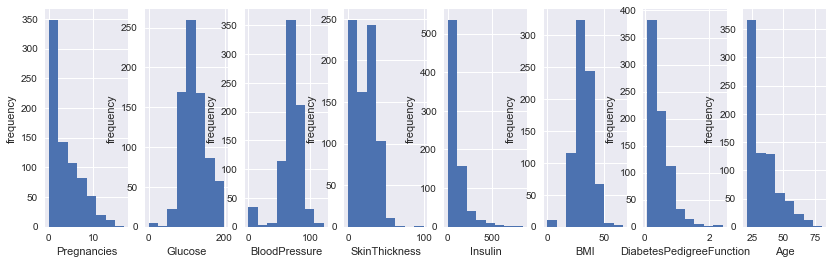

In [263]:
gen_hist()

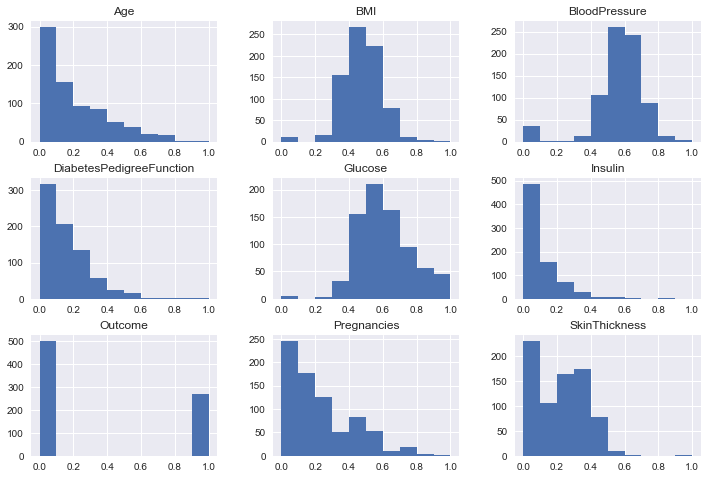

In [493]:
df.hist(figsize=(12,8));

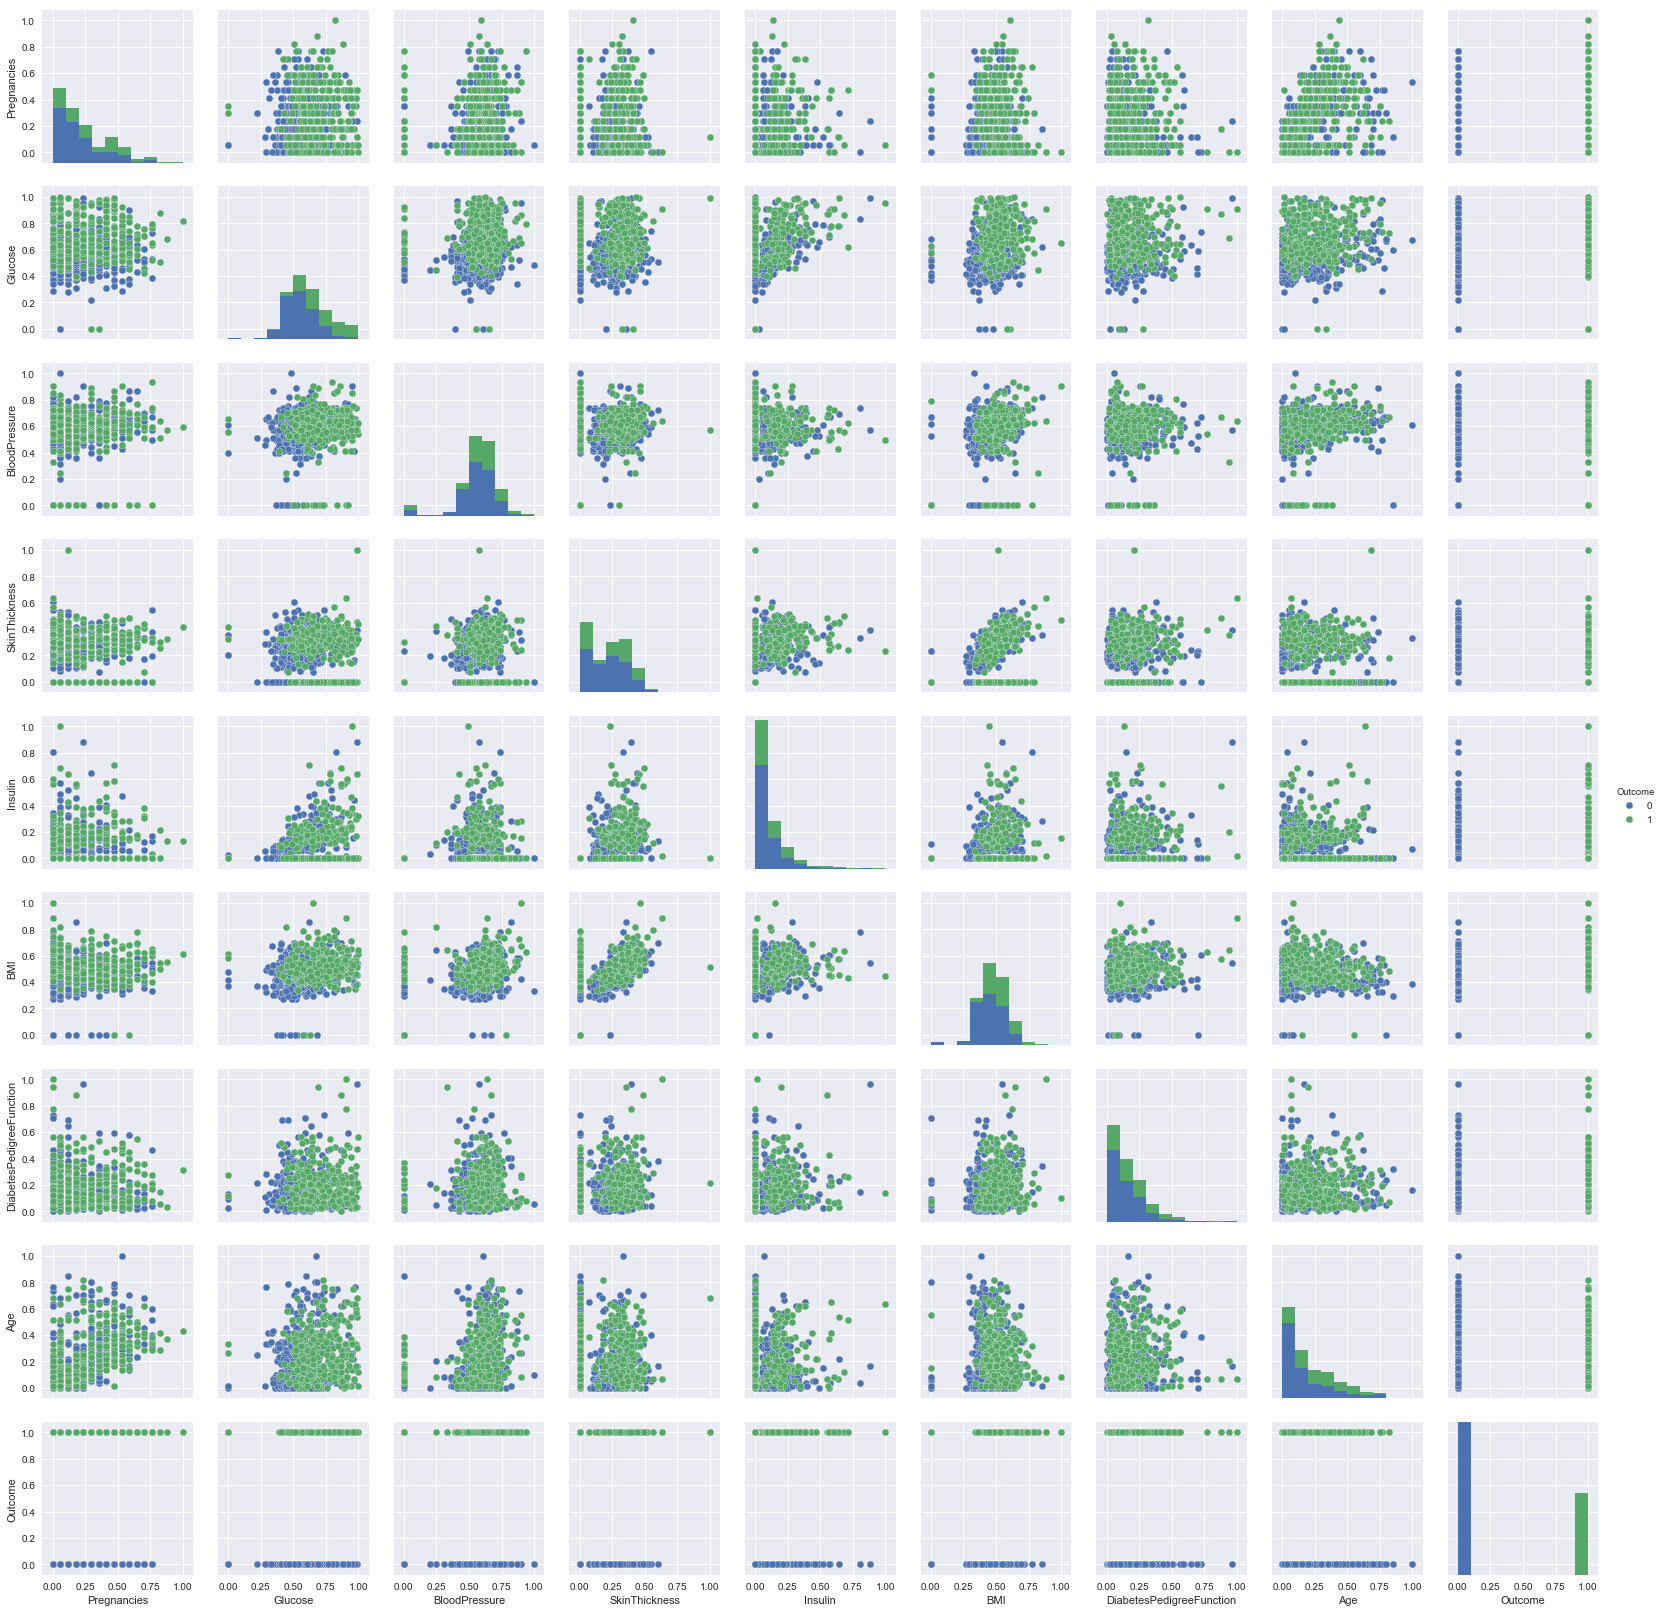

In [494]:
sns.pairplot(df, hue='Outcome')

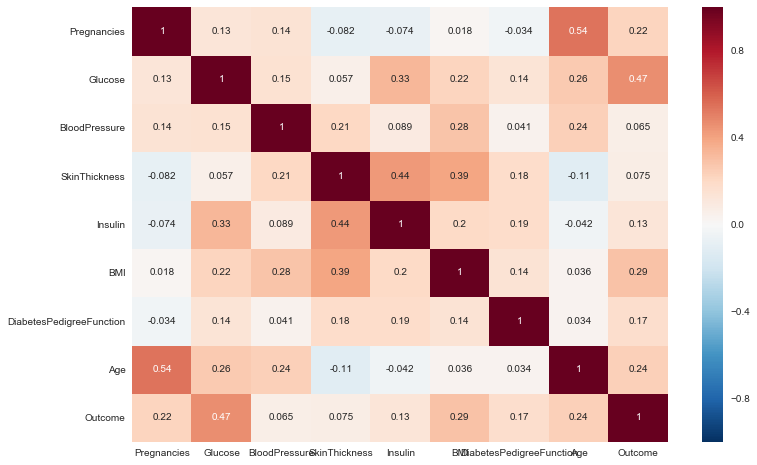

In [497]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True);

In [264]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [265]:
df['Pregnancies'] = df['Pregnancies'].astype("float64")
df['Glucose'] = df['Glucose'].astype("float64")
df['BloodPressure'] = df['BloodPressure'].astype("float64")
df['SkinThickness'] = df['SkinThickness'].astype("float64")
df['Insulin'] = df['Insulin'].astype("float64")
df['Age'] = df['Age'].astype("float64")

In [266]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [267]:
scaler = MinMaxScaler()

In [268]:
for i in df.drop('Outcome', axis=1).columns:
    df[i] = scaler.fit_transform(df[i])

/anaconda3/envs/ztdl/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda3/envs/ztdl/lib/python3.5/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda3/envs/ztdl/lib/python3.5/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your dat

In [269]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [270]:
df['Outcome'].unique()

array([1, 0])

In [271]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values
y_cat = to_categorical(y)

In [272]:
y_cat

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=22)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

## Exercise 2
Build a fully connected NN model that predicts diabetes. Follow these steps:

1. Split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

In [411]:
X.shape

(768, 8)

In [415]:
def build_model():
    model = Sequential()
    model.add(Dense(64,input_shape=(8,), activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    # softmax and categorical_crossentropy go hand in hand
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy']) 
    return(model)

In [425]:
model = build_model()

In [426]:
model.fit(X_train, y_train, epochs=1000, validation_split=0.1, verbose=0)

In [427]:
y_pred = model.predict_classes(X_test)

 32/154 [=====>........................] - ETA: 1s

In [428]:
y_test_classes = np.argmax(y_test, axis=1)

In [429]:
accuracy_score(y_test_classes, y_pred)

0.7142857142857143

In [431]:
pd.Series(y_test_classes).value_counts() / len(y_test_classes)

0    0.649351
1    0.350649
dtype: float64

In [432]:
print(confusion_matrix(y_test_classes, y_pred))

[[83 17]
 [27 27]]


In [433]:
print(classification_report(y_test_classes, y_pred))

             precision    recall  f1-score   support

          0       0.75      0.83      0.79       100
          1       0.61      0.50      0.55        54

avg / total       0.71      0.71      0.71       154



## Exercise 3
Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/d/uciml/pima-indians-diabetes-database/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?

In [434]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [435]:
param_grid = {'C': [0.01, 0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [436]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [437]:
print(X_train.shape)
print(y_train.shape)

(614, 8)
(614,)


In [438]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=0.01, kernel=rbf, gamma=1 .....................................
[CV] ...... C=0.01, kernel=rbf, gamma=1, score=0.650485, total=   0.0s
[CV] C=0.01, kernel=rbf, gamma=1 .....................................
[CV] ...... C=0.01, kernel=rbf, gamma=1, score=0.651961, total=   0.0s
[CV] C=0.01, kernel=rbf, gamma=1 .....................................
[CV] ...... C=0.01, kernel=rbf, gamma=1, score=0.651961, total=   0.0s
[CV] C=0.01, kernel=rbf, gamma=0.1 ...................................
[CV] .... C=0.01, kernel=rbf, gamma=0.1, score=0.650485, total=   0.0s
[CV] C=0.01, kernel=rbf, gamma=0.1 ...................................
[CV] .... C=0.01, kernel=rbf, gamma=0.1, score=0.651961, total=   0.0s
[CV] C=0.01, kernel=rbf, gamma=0.1 ...................................
[CV] .... C=0.01, kernel=rbf, gamma=0.1, score=0.651961, total=   0.0s
[CV] C=0.01, kernel=rbf, gamma=0.01 ..................................
[CV] ... C=0.01,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... C=0.1, kernel=rbf, gamma=0.01, score=0.651961, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.01 ...................................
[CV] .... C=0.1, kernel=rbf, gamma=0.01, score=0.651961, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.001 ..................................
[CV] ... C=0.1, kernel=rbf, gamma=0.001, score=0.650485, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.001 ..................................
[CV] ... C=0.1, kernel=rbf, gamma=0.001, score=0.651961, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.001 ..................................
[CV] ... C=0.1, kernel=rbf, gamma=0.001, score=0.651961, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.0001 .................................
[CV] .. C=0.1, kernel=rbf, gamma=0.0001, score=0.650485, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.0001 .................................
[CV] .. C=0.1, kernel=rbf, gamma=0.0001, score=0.651961, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.0001 .................................
[CV] .

[CV] ... C=1000, kernel=rbf, gamma=0.01, score=0.750000, total=   0.0s
[CV] C=1000, kernel=rbf, gamma=0.001 .................................
[CV] .. C=1000, kernel=rbf, gamma=0.001, score=0.786408, total=   0.0s
[CV] C=1000, kernel=rbf, gamma=0.001 .................................
[CV] .. C=1000, kernel=rbf, gamma=0.001, score=0.784314, total=   0.0s
[CV] C=1000, kernel=rbf, gamma=0.001 .................................
[CV] .. C=1000, kernel=rbf, gamma=0.001, score=0.750000, total=   0.0s
[CV] C=1000, kernel=rbf, gamma=0.0001 ................................
[CV] . C=1000, kernel=rbf, gamma=0.0001, score=0.771845, total=   0.0s
[CV] C=1000, kernel=rbf, gamma=0.0001 ................................
[CV] . C=1000, kernel=rbf, gamma=0.0001, score=0.730392, total=   0.0s
[CV] C=1000, kernel=rbf, gamma=0.0001 ................................
[CV] . C=1000, kernel=rbf, gamma=0.0001, score=0.730392, total=   0.0s


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [439]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [440]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [441]:
grid_predictions = grid.predict(X_test)

In [442]:
print(confusion_matrix(y_test,grid_predictions))

[[93  7]
 [34 20]]


In [443]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.73      0.93      0.82       100
          1       0.74      0.37      0.49        54

avg / total       0.74      0.73      0.71       154



In [444]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [450]:
X = df[['Glucose','Insulin', 'BMI', 'Age']]
y = df['Outcome']

In [451]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [452]:
param_grid = {'C': [0.01, 0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train, y_train)
grid_predictions = grid.predict(X_test)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] C=0.01, kernel=rbf, gamma=1 .....................................
[CV] ...... C=0.01, kernel=rbf, gamma=1, score=0.650485, total=   0.0s
[CV] C=0.01, kernel=rbf, gamma=1 .....................................
[CV] ...... C=0.01, kernel=rbf, gamma=1, score=0.651961, total=   0.0s
[CV] C=0.01, kernel=rbf, gamma=1 .....................................
[CV] ...... C=0.01, kernel=rbf, gamma=1, score=0.651961, total=   0.0s
[CV] C=0.01, kernel=rbf, gamma=0.1 ...................................
[CV] .... C=0.01, kernel=rbf, gamma=0.1, score=0.650485, total=   0.0s
[CV] C=0.01, kernel=rbf, gamma=0.1 ...................................
[CV] .... C=0.01, kernel=rbf, gamma=0.1, score=0.651961, total=   0.0s
[CV] C=0.01, kernel=rbf, gamma=0.1 ...................................
[CV] .... C=0.01, kernel=rbf, gamma=0.1, score=0.651961, total=   0.0s
[CV] C=0.01, kernel=rbf, gamma=0.01 ..................................
[CV] ... C=0.01,

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... C=0.1, kernel=rbf, gamma=0.01, score=0.651961, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.01 ...................................
[CV] .... C=0.1, kernel=rbf, gamma=0.01, score=0.651961, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.001 ..................................
[CV] ... C=0.1, kernel=rbf, gamma=0.001, score=0.650485, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.001 ..................................
[CV] ... C=0.1, kernel=rbf, gamma=0.001, score=0.651961, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.001 ..................................
[CV] ... C=0.1, kernel=rbf, gamma=0.001, score=0.651961, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.0001 .................................
[CV] .. C=0.1, kernel=rbf, gamma=0.0001, score=0.650485, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.0001 .................................
[CV] .. C=0.1, kernel=rbf, gamma=0.0001, score=0.651961, total=   0.0s
[CV] C=0.1, kernel=rbf, gamma=0.0001 .................................
[CV] .

[CV] . C=1000, kernel=rbf, gamma=0.0001, score=0.666667, total=   0.0s
[CV] C=1000, kernel=rbf, gamma=0.0001 ................................
[CV] . C=1000, kernel=rbf, gamma=0.0001, score=0.715686, total=   0.0s


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.8s finished


In [453]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[92  8]
 [32 22]]
             precision    recall  f1-score   support

          0       0.74      0.92      0.82       100
          1       0.73      0.41      0.52        54

avg / total       0.74      0.74      0.72       154



In [457]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [458]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[89 11]
 [27 27]]
             precision    recall  f1-score   support

          0       0.77      0.89      0.82       100
          1       0.71      0.50      0.59        54

avg / total       0.75      0.75      0.74       154



In [460]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

In [461]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[79 21]
 [26 28]]
             precision    recall  f1-score   support

          0       0.75      0.79      0.77       100
          1       0.57      0.52      0.54        54

avg / total       0.69      0.69      0.69       154



In [462]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [482]:
X = df[['Glucose','Insulin', 'BMI', 'Age']].values
y = df['Outcome'].values
y_cat = to_categorical(y)

In [483]:
X.shape

(768, 4)

In [471]:
y_cat

array([[ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       ..., 
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.]])

In [484]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=22)

In [477]:
X_train.shape

(614, 4)

In [478]:
y_train.shape

(614, 2)

In [485]:
def build_model():
    model = Sequential()
    model.add(Dense(32,input_shape=(4,), activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(16, activation='tanh'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    # softmax and categorical_crossentropy go hand in hand
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy']) 
    return(model)

In [486]:
model = build_model()
model.fit(X_train, y_train, epochs=1000, validation_split=0.1, verbose=0)

In [487]:
y_pred = model.predict_classes(X_test)
y_test_classes = np.argmax(y_test, axis=1)

 32/154 [=====>........................] - ETA: 1s

In [488]:
accuracy_score(y_test_classes, y_pred)

0.7142857142857143

In [489]:
print(confusion_matrix(y_test_classes, y_pred))

[[79 21]
 [23 31]]


In [490]:
print(classification_report(y_test_classes, y_pred))

             precision    recall  f1-score   support

          0       0.77      0.79      0.78       100
          1       0.60      0.57      0.58        54

avg / total       0.71      0.71      0.71       154

